In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

### Task 1
- Each column represents the weigths in the model we are using.
- Each row is a datapoint
- The 1s is a way of augmenting X so that we get w_o, or the first weight into the matrix
- y is 3x1 and X is 3x2


Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    #return (1/len(y))*np.abs(y-np.dot(tx,w))
    return (1/(2*len(y)))*np.dot((y-np.dot(tx,w)).T,y-np.dot(tx,w))
    # TODO: compute loss by MSE
    # ***************************************************
    


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search"""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_loss(y, tx, [w0[i], w1[j]])
    
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.522 seconds


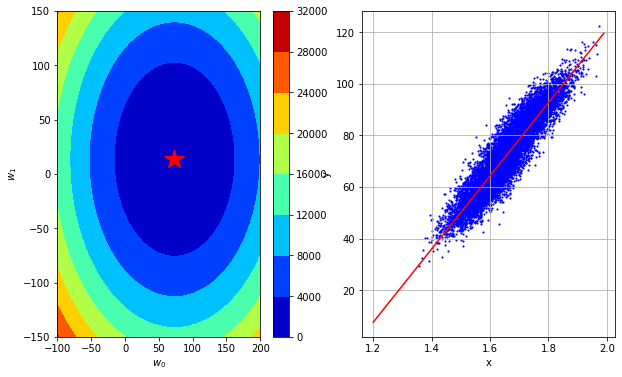

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HER
    
    return -(1/len(y))*np.dot(tx.T, y - np.dot(tx,w))

    # TODO: compute gradient and error vector
    # ***************************************************
    
compute_gradient(y,tx,[50,10])

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y,tx,ws[n_iter])
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w =  w-gamma*gradient
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1

# Initialization
w_initial = np.array([-1, 1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2853.050922326284, w0=73.29392200210505, w1=13.479712434988908
Gradient Descent(1/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(2/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(3/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(4/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(5/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(6/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(7/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(8/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(9/49): loss=15.385887868829398, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(10/49): loss=15.385887868829398, w0=73.29392200210519,

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    
    return -np.dot(tx.T, y - np.dot(tx,w))

    # ***************************************************


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE

    # TODO: implement stochastic gradient descent.
    # ***************************************************

    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(batch_y, batch_x, w)
            loss = compute_loss(batch_y,batch_x,w)
            w =  w-gamma*gradient
            # store w and loss
            ws.append(w)
            

        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws



In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.05
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=2773.3337092482334, w0=3.7237975973784034, w1=-1.0638740297399154
Gradient Descent(1/99): loss=2674.0989225055037, w0=7.380366291185142, w1=-1.6735921018713424
Gradient Descent(2/99): loss=4528.607860548948, w0=12.138836560372997, w1=4.46891348246103
Gradient Descent(3/99): loss=1212.8944841902814, w0=14.601451516258592, w1=2.7328393548723873
Gradient Descent(4/99): loss=1971.939427895649, w0=17.741466984290277, w1=3.9264157665390487
Gradient Descent(5/99): loss=1158.4650035288619, w0=20.14819194108204, w1=1.8040443430019852
Gradient Descent(6/99): loss=2192.570508651892, w0=23.459211805604067, w1=5.108959309092107
Gradient Descent(7/99): loss=771.8998551593086, w0=25.423772640955455, w1=5.423167525586295
Gradient Descent(8/99): loss=1538.6352118405653, w0=28.197430164732108, w1=7.422582931532591
Gradient Descent(9/99): loss=730.4003770533745, w0=30.108451327688414, w1=5.222221781320792
Gradient Descent(10/99): loss=797.5598197464997, w0=32.10539877284877, 

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

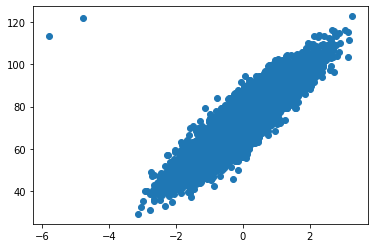

In [14]:
import datetime
from helpers import *

height_o, weight_o, gender_o = load_data(sub_sample=False, add_outlier=True)
x_o, mean_x_o, std_x_o = standardize(height_o)
y_o, tx_o = build_model_data(x_o, weight_o)

fig = plt.scatter(x_o,y_o)


### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)